In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import json

try:
    data = pd.read_json('data/data.json')
    print(data)
except FileNotFoundError:
    print("The file 'data.json' was not found. Please check the file path.")
except ValueError as e:
    print(f"Error loading JSON data: {e}")

                                                            ABCD syndrome  \
Specialty                                                      [genetics]   
Overview                Albinism-black lock-cell migration disorder (A...   
Causes                  {'Summary': 'Researchers in the past 20 years ...   
Diagnosis               {'Summary': 'The occurrence of WS has been rep...   
Treatment               {'Summary': 'If the Hirschsprung's disease is ...   
Total Revisions                                                       125   
Last Revision Date                                   2024-05-26T14:35:47Z   
Genetic Associations                                              [EDNRB]   
Alias                                                                 NaN   
Symptoms                                                              NaN   
Prevention                                                            NaN   
Symptoms List                                                         NaN   

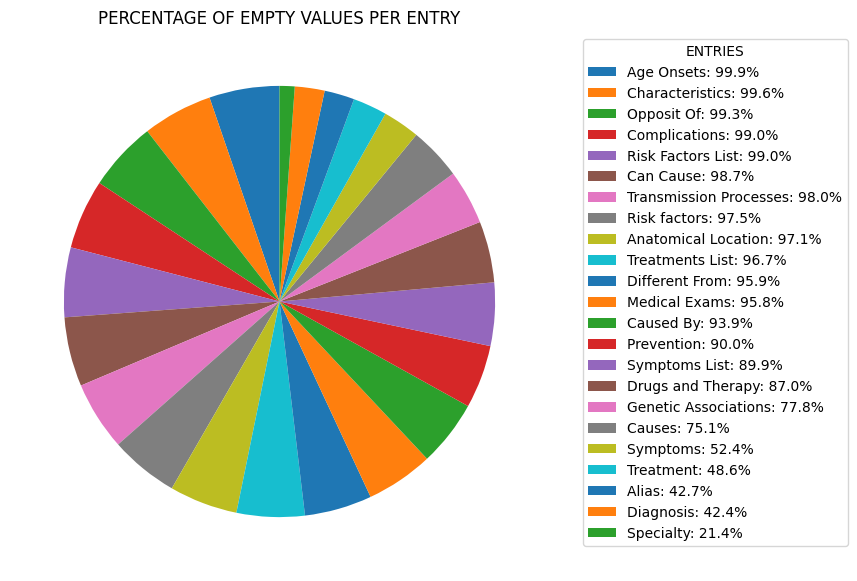

In [42]:
missing_percentages_per_entry = data.isnull().mean(axis=1) * 100
missing_percentages_per_entry = missing_percentages_per_entry[missing_percentages_per_entry > 0]

if missing_percentages_per_entry.empty:
    print("There is no empty spaces")
else:
    missing_percentages_per_entry = missing_percentages_per_entry.sort_values(ascending=False)
    plt.figure(figsize=(7, 7))
    wedges, texts = plt.pie(missing_percentages_per_entry, startangle=90)
    plt.title("PERCENTAGE OF EMPTY VALUES PER ENTRY")
    legend_labels = [f'{index}: {value:.1f}%' for index, value in zip(missing_percentages_per_entry.index, missing_percentages_per_entry)]
    plt.legend(legend_labels, title="ENTRIES", bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.show()

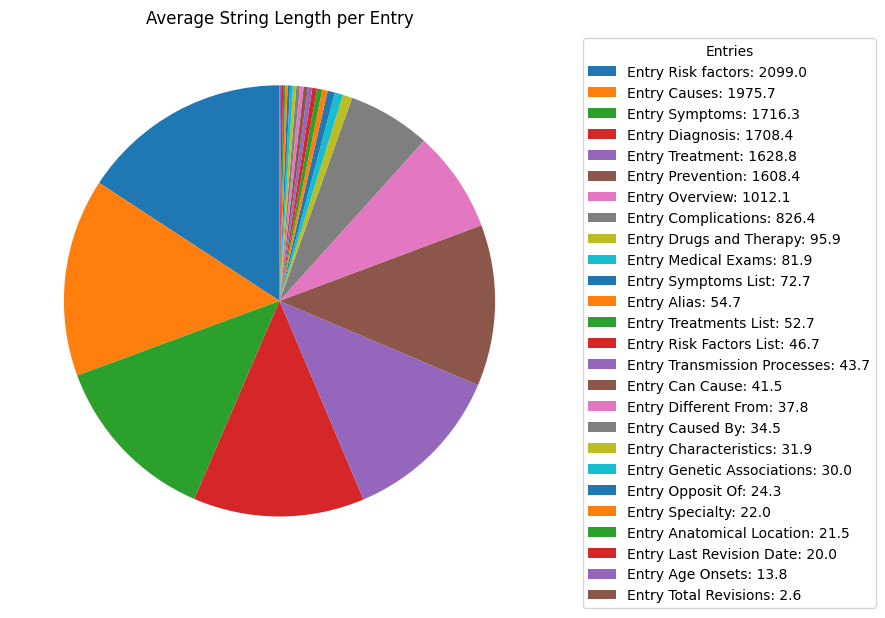

In [43]:
def mean_string_length(entry):
    strings = entry.dropna().astype(str)
    string_lengths = strings.apply(len)
    return string_lengths.mean()

mean_lengths_per_entry = data.apply(mean_string_length, axis=1)
mean_lengths_per_entry = mean_lengths_per_entry[mean_lengths_per_entry.notna()]

if mean_lengths_per_entry.empty:
    print("There are no valid string lengths in any entry.")
else:
    mean_lengths_per_entry = mean_lengths_per_entry.sort_values(ascending=False)
    plt.figure(figsize=(7, 7))
    wedges, texts = plt.pie(mean_lengths_per_entry, startangle=90)
    plt.title("Average String Length per Entry")
    legend_labels = [f'Entry {index}: {value:.1f}' for index, value in zip(mean_lengths_per_entry.index, mean_lengths_per_entry)]
    plt.legend(legend_labels, title="Entries", bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.show()
